In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

In [30]:
# List of file names
file_names = [
    '9171_20240626_120 s_N11503200095_Polarization_High to low_80 deg C_4 mpm_corr (1).csv',
    '9171_20240626_120 s_N11503200095_Polarization_High to low_80 deg C_4 mpm_corr (2).csv',
    '9171_20240626_120 s_N11503200095_Polarization_Low to high_80 deg C_4 mpm_corr (1).csv',
    '9171_20240626_120 s_N11503200095_Polarization_Low to high_80 deg C_4 mpm_corr (2).csv',
    '9171_20240627_120 s_N11503200095_Polarization_High to low_80 deg C_6 mpm_corr (1).csv',
    '9171_20240627_120 s_N11503200095_Polarization_High to low_80 deg C_6 mpm_corr (2).csv',
    '9171_20240627_120 s_N11503200095_Polarization_Low to high_80 deg C_6 mpm_corr (1).csv',
    '9171_20240627_120 s_N11503200095_Polarization_Low to high_80 deg C_6 mpm_corr (2).csv'
]

# Dictionary to hold DataFrames
dataframes = {}

# Function to clean and rename the DataFrame columns
def process_dataframe(df, file_name):
    # Rename the columns
    df.columns = ['Time (HH:mm:ss.SSS)', 'Channel', 'CH', 'unnamed2', 'V', 'unnamed3', 'A', 'unnamed4']
    # Remove the brackets in 'Channel' and 'Time (HH:mm:ss.SSS)' columns
    df['Channel'] = df['Channel'].str.strip('[]')
    df['Time (HH:mm:ss.SSS)'] = df['Time (HH:mm:ss.SSS)'].str.strip('()')
    # Discard the unnecessary columns
    df = df.drop(columns=['unnamed2', 'unnamed3', 'unnamed4'])
    # Extract the relevant part of the file name for 'Data Source'
    middle_part = re.search(r'Polarization_(.*?) mpm_corr', file_name).group(1)
    df['Data Source'] = middle_part
    return df

# Read each file into a DataFrame with error handling and process them
for file in file_names:
    try:
        # Extract a unique key for the dictionary
        key = file.replace(' ', '_').replace('.', '_').replace('(', '').replace(')', '')
        # Attempt to read the CSV file starting from the 5th row
        df = pd.read_csv(file, skiprows=5)
        # Process the DataFrame
        dataframes[key] = process_dataframe(df, file)
        # print(f"Successfully read and processed {file}")
    except pd.errors.ParserError as e:
        print(f"Error reading {file}: {e}")
    except ValueError as e:
        print(f"Error processing {file}: {e}")

# Display the first 5 rows of each DataFrame
for key, df in dataframes.items():
    print(f"Head of DataFrame {key}:")
    print(df.head(5))
    print("\n")

Head of DataFrame 9171_20240626_120_s_N11503200095_Polarization_High_to_low_80_deg_C_4_mpm_corr_1_csv:
  Time (HH:mm:ss.SSS)    Channel   CH      V      A             Data Source
0        12:25:10.456  0.7850168  CH1   3.25  6.752  High to low_80 deg C_4
1        12:25:10.688  1.0167013  CH1  3.257  6.752  High to low_80 deg C_4
2        12:25:10.918  1.2468257  CH1  3.262  6.752  High to low_80 deg C_4
3        12:25:11.163   1.492032  CH1  3.264  6.752  High to low_80 deg C_4
4        12:25:11.395  1.7237525  CH1  3.265  6.752  High to low_80 deg C_4


Head of DataFrame 9171_20240626_120_s_N11503200095_Polarization_High_to_low_80_deg_C_4_mpm_corr_2_csv:
  Time (HH:mm:ss.SSS)    Channel   CH      V      A             Data Source
0        13:55:18.268  0.7899947  CH1  3.197  6.752  High to low_80 deg C_4
1        13:55:18.498  1.0197068  CH1  3.205  6.752  High to low_80 deg C_4
2        13:55:18.728  1.2500201  CH1  3.211  6.752  High to low_80 deg C_4
3        13:55:18.977  1.4984429

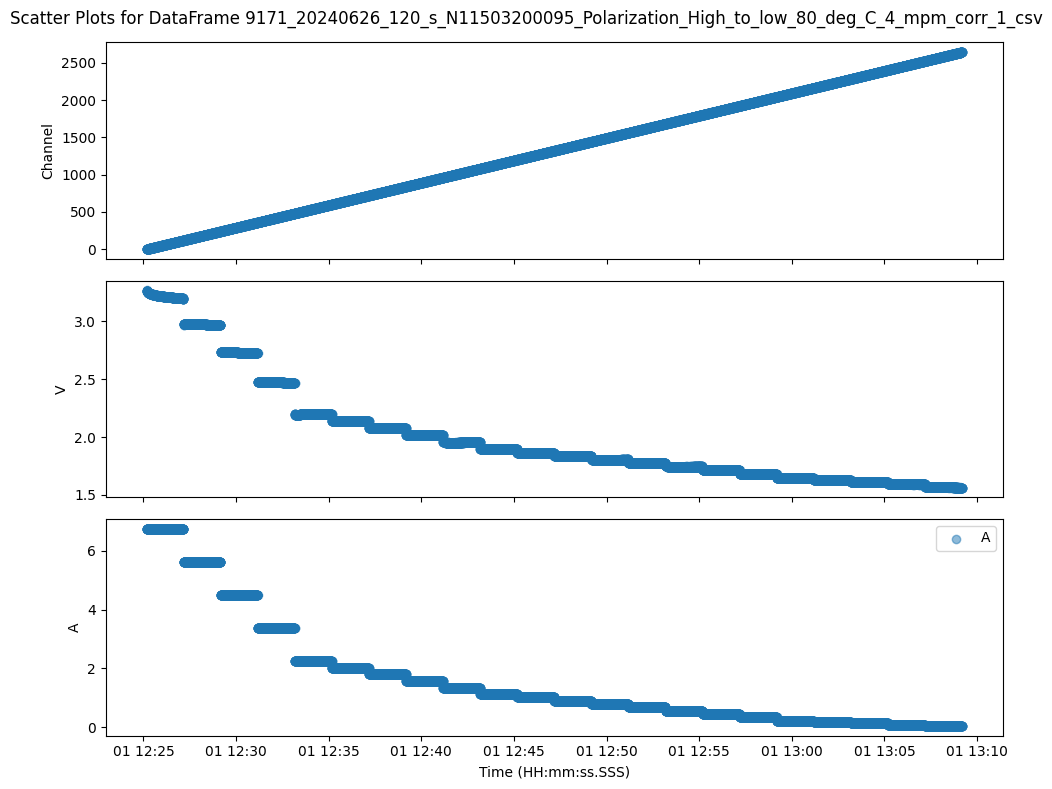

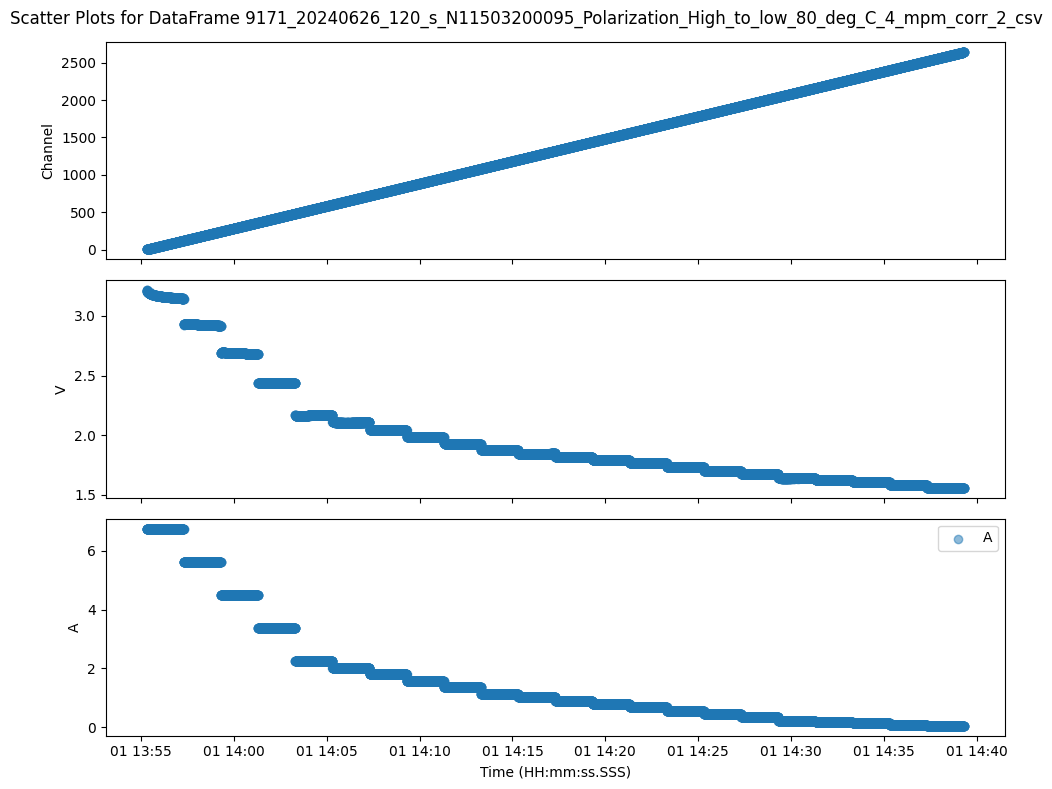

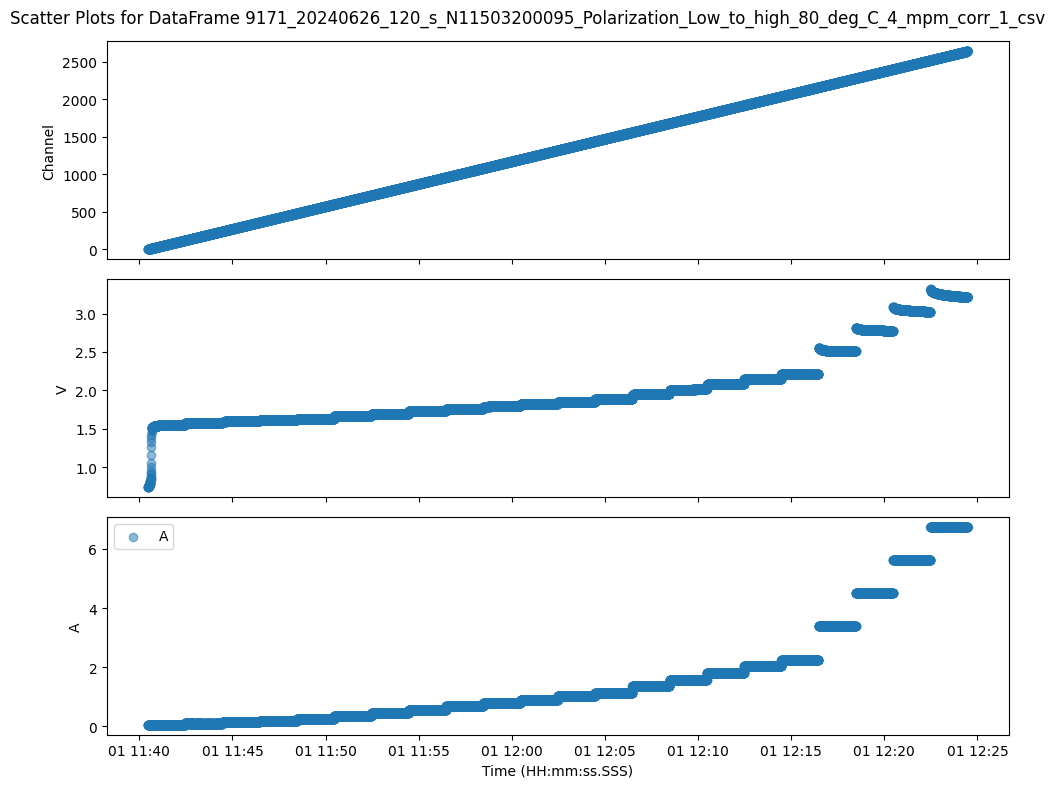

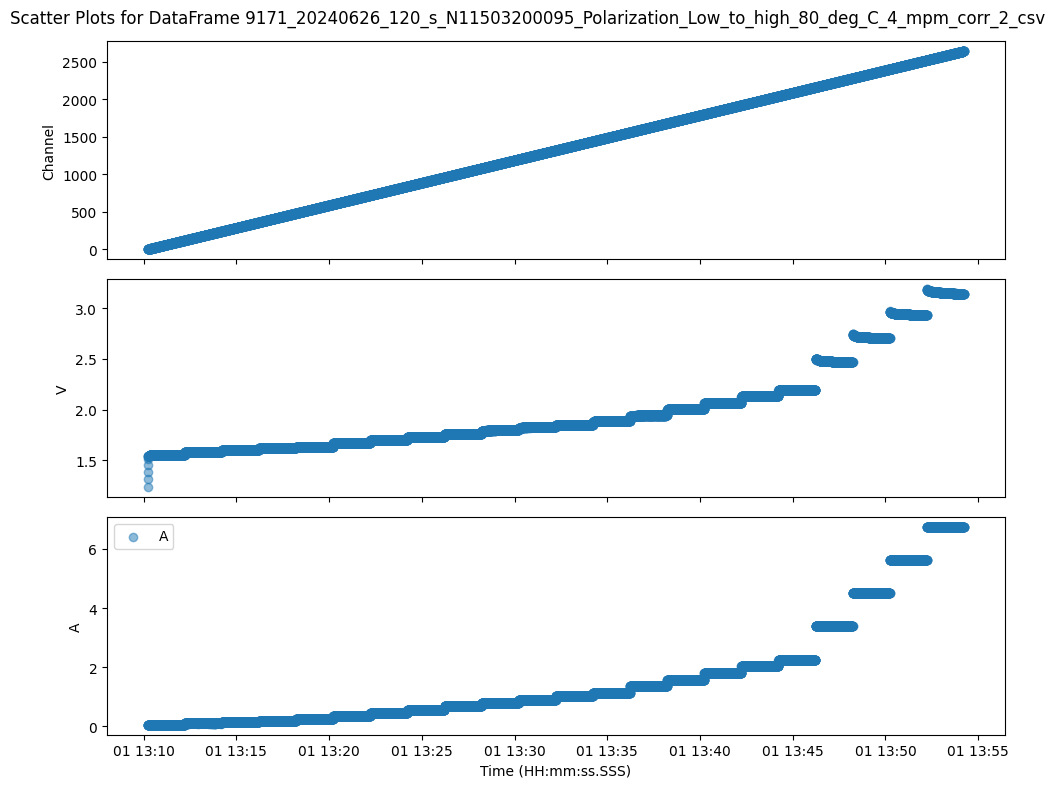

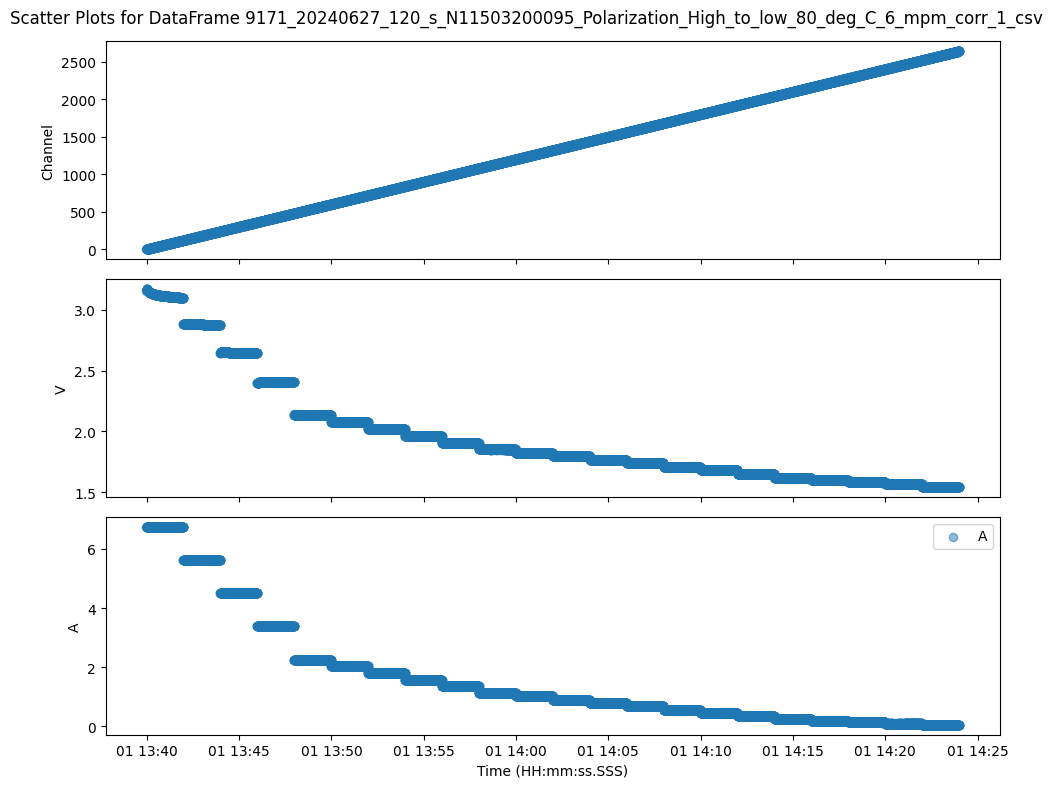

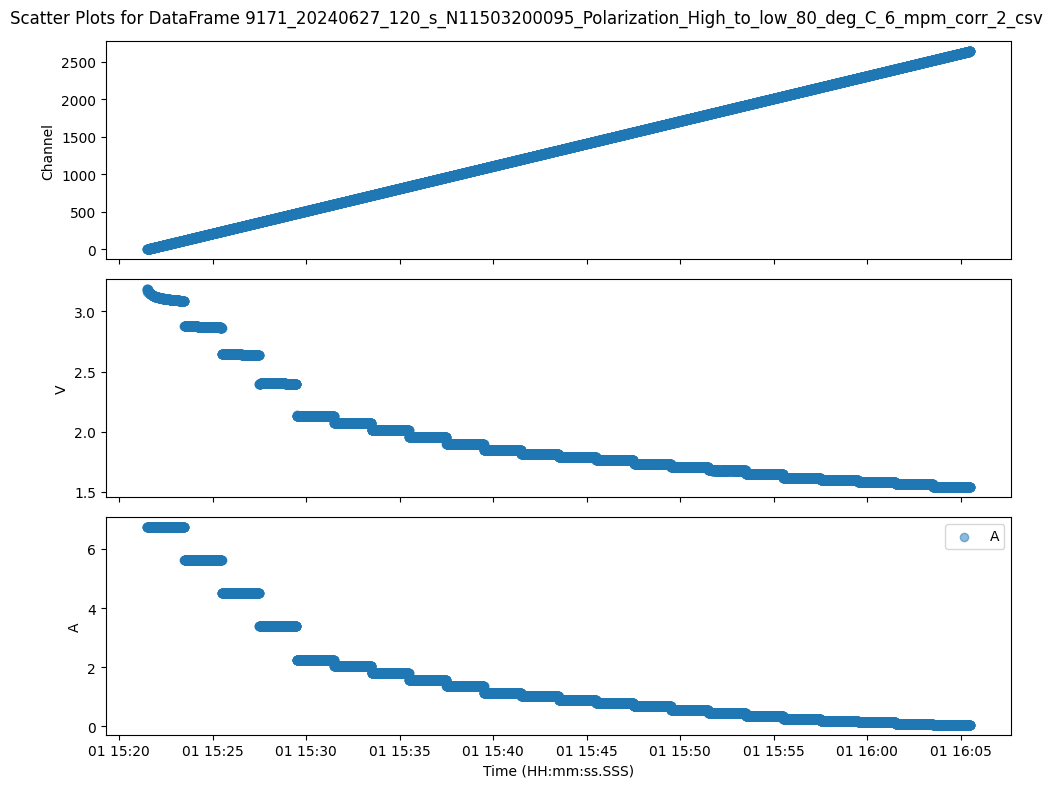

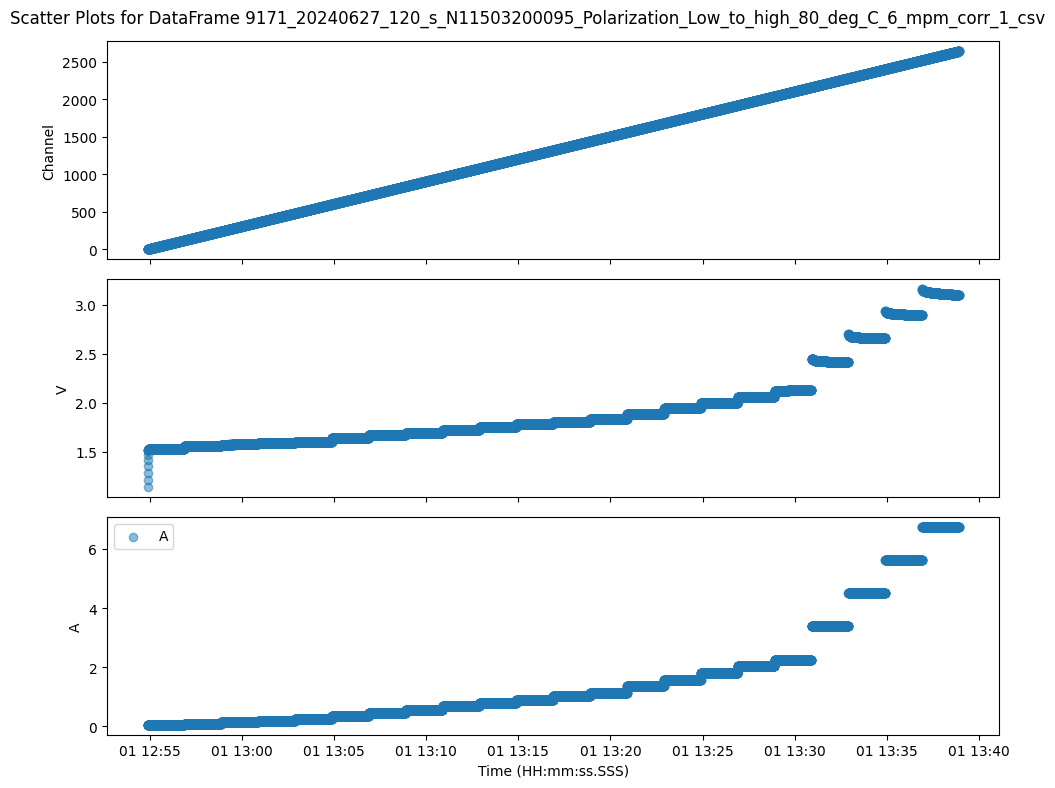

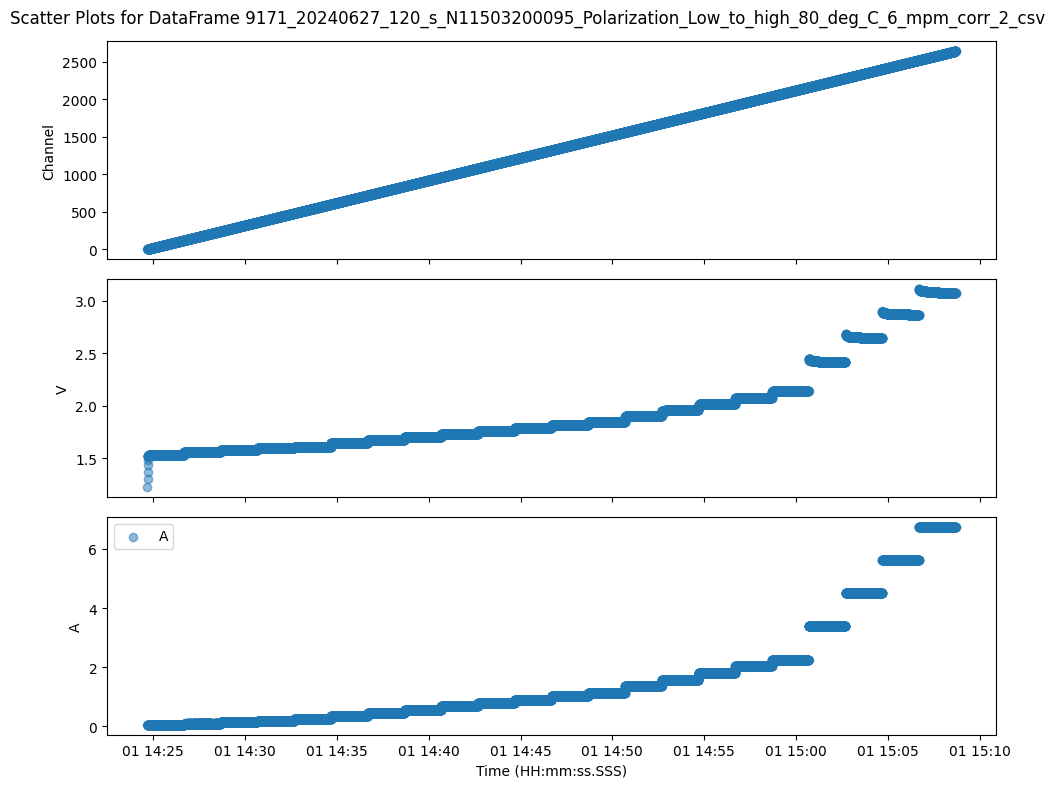

In [31]:
# Create a scatter plot for each DataFrame
for key, df in dataframes.items():
    # Convert 'Time (HH:mm:ss.SSS)' to datetime if it's not already
    df['Time (HH:mm:ss.SSS)'] = pd.to_datetime(df['Time (HH:mm:ss.SSS)'], format='%H:%M:%S.%f', errors='coerce')
    
    # Ensure 'Channel', 'V', and 'A' are numeric
    df[['Channel', 'V', 'A']] = df[['Channel', 'V', 'A']].apply(pd.to_numeric, errors='coerce')
    
    # Plotting setup
    fig, axs = plt.subplots(nrows=3, figsize=(10, 8), sharex=True)
    fig.suptitle(f"Scatter Plots for DataFrame {key}")

    # Plot each column on separate subplot
    axs[0].scatter(df['Time (HH:mm:ss.SSS)'], df['Channel'], label='Channel', alpha=0.5)
    axs[1].scatter(df['Time (HH:mm:ss.SSS)'], df['V'], label='V', alpha=0.5)
    axs[2].scatter(df['Time (HH:mm:ss.SSS)'], df['A'], label='A', alpha=0.5)
    
    # Set Y-axis labels
    axs[0].set_ylabel('Channel')
    axs[1].set_ylabel('V')
    axs[2].set_ylabel('A')
    
    # X-axis label and legend
    axs[-1].set_xlabel('Time (HH:mm:ss.SSS)')
    axs[-1].legend()
    
    # Adjust layout
    plt.tight_layout()
    plt.show()


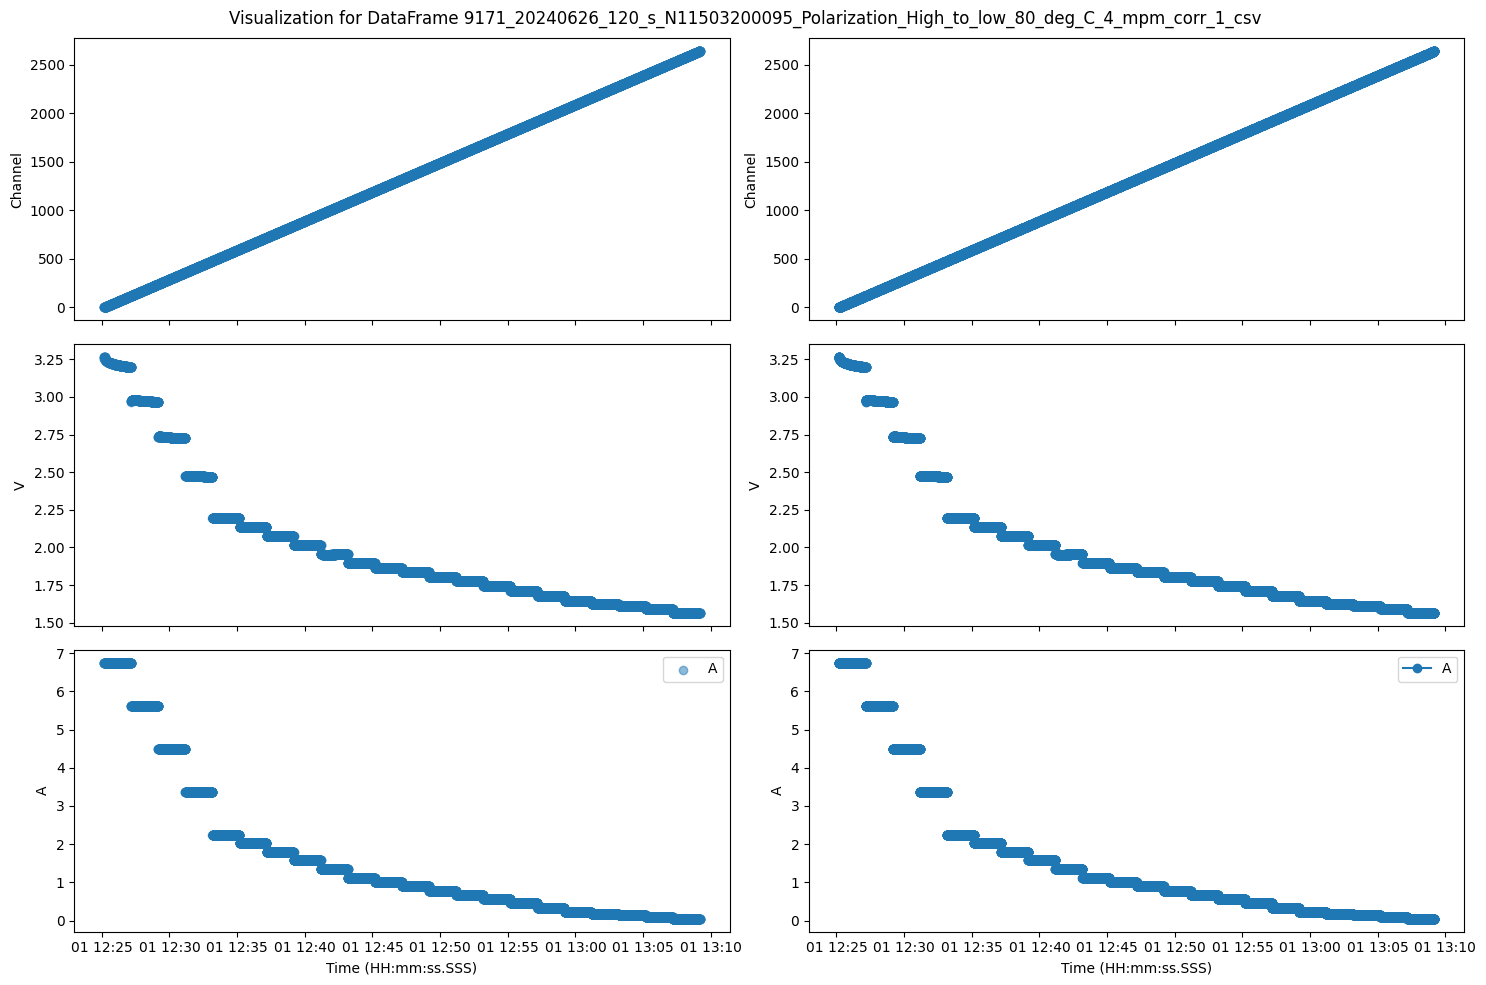

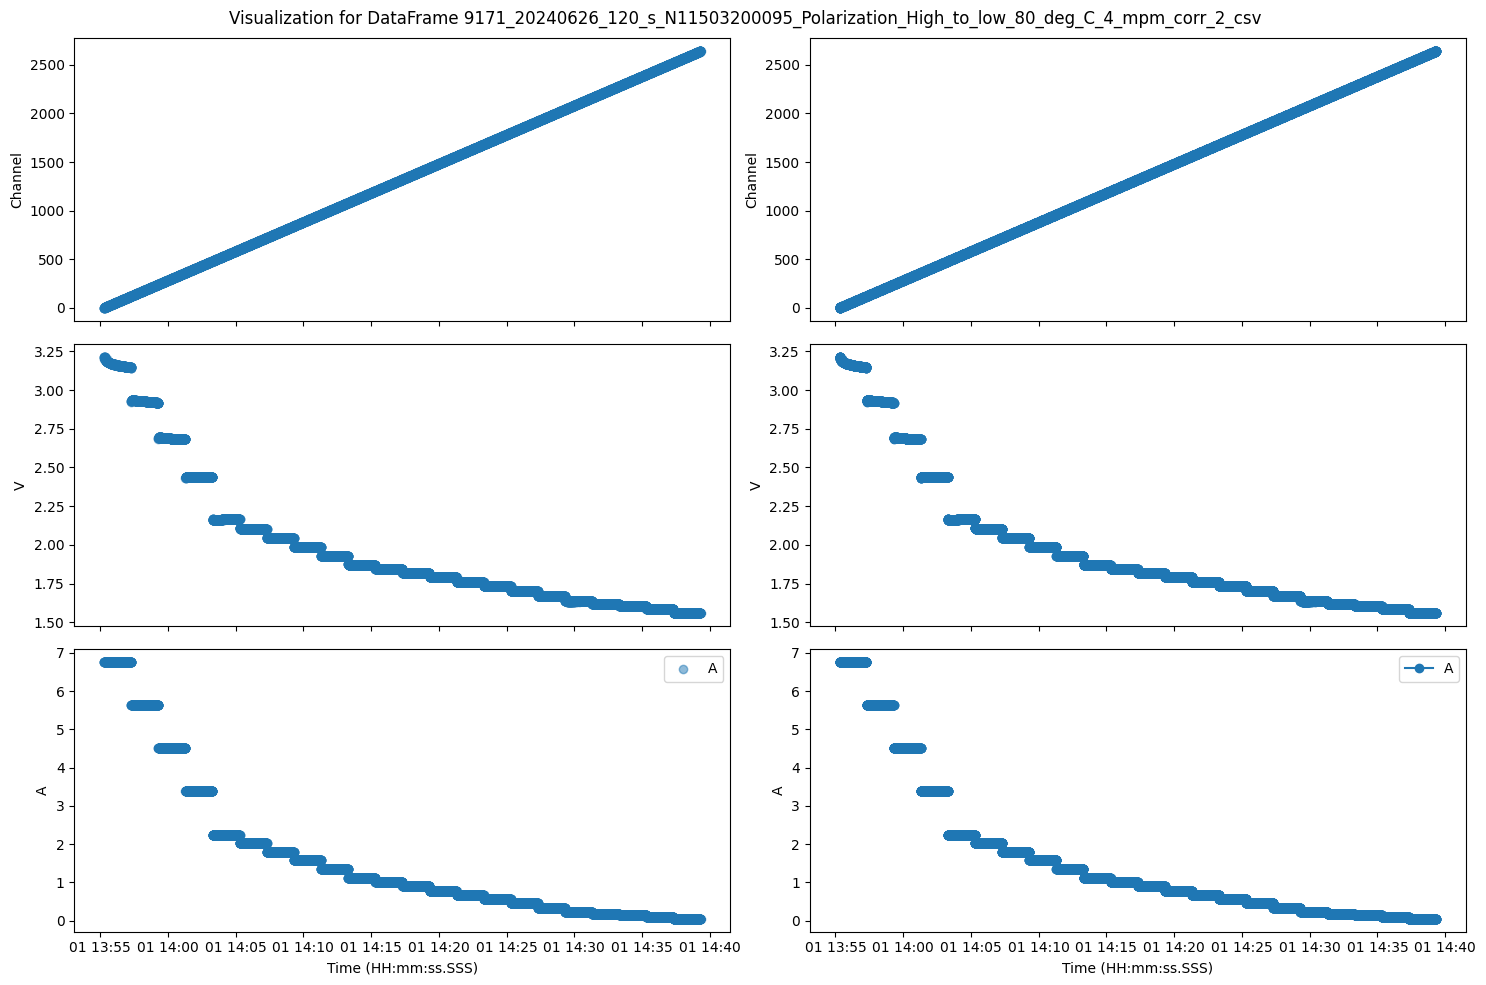

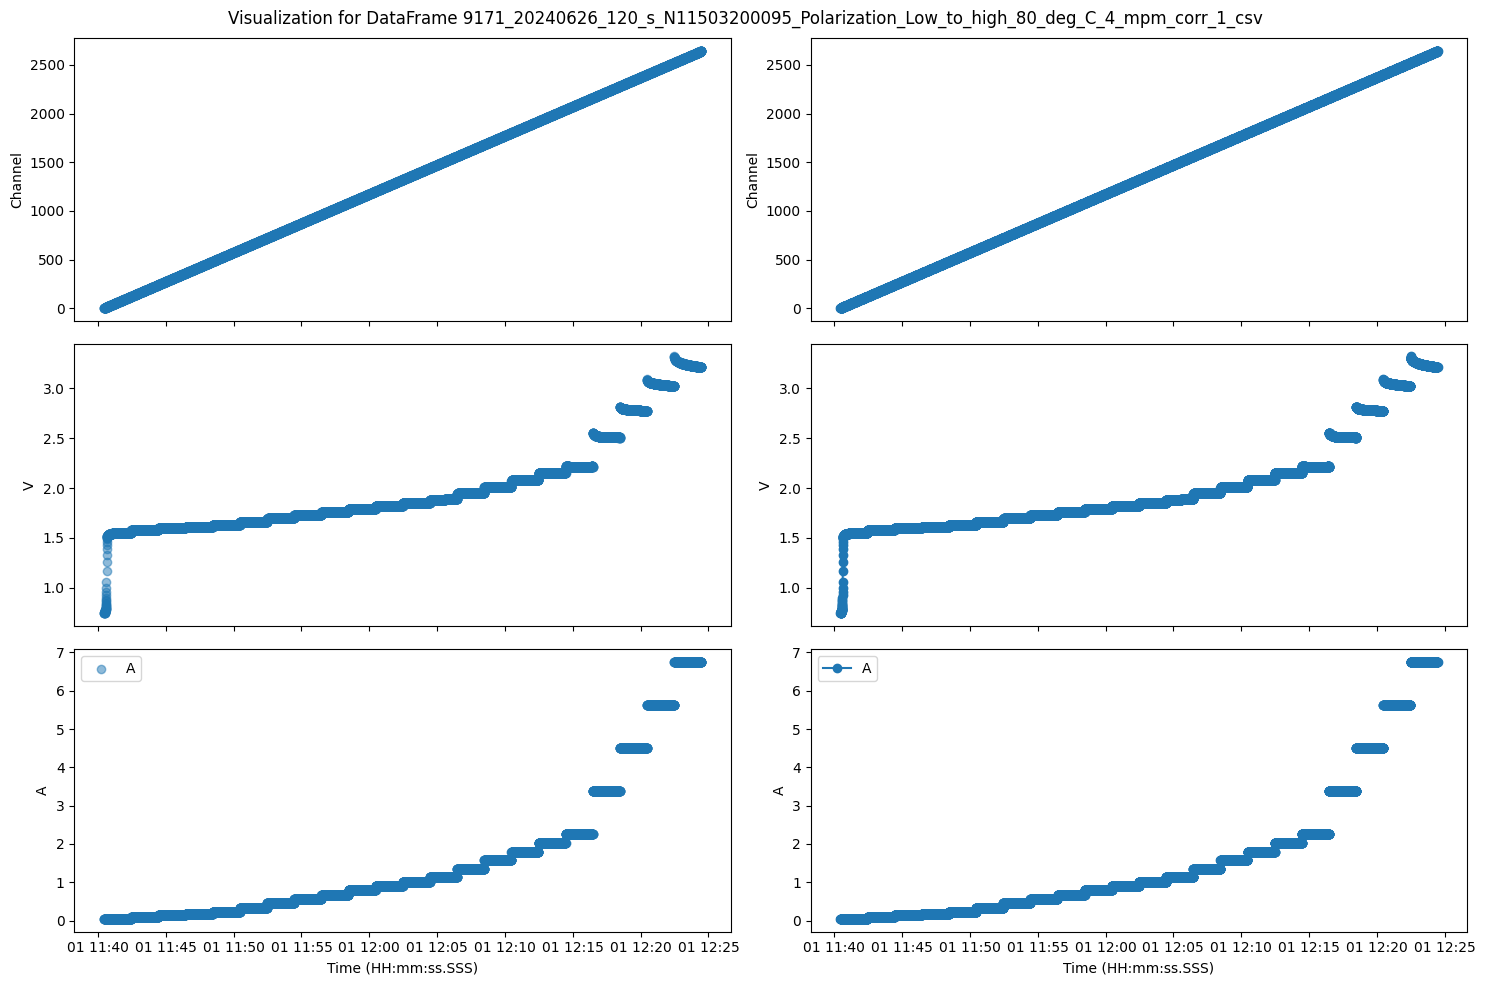

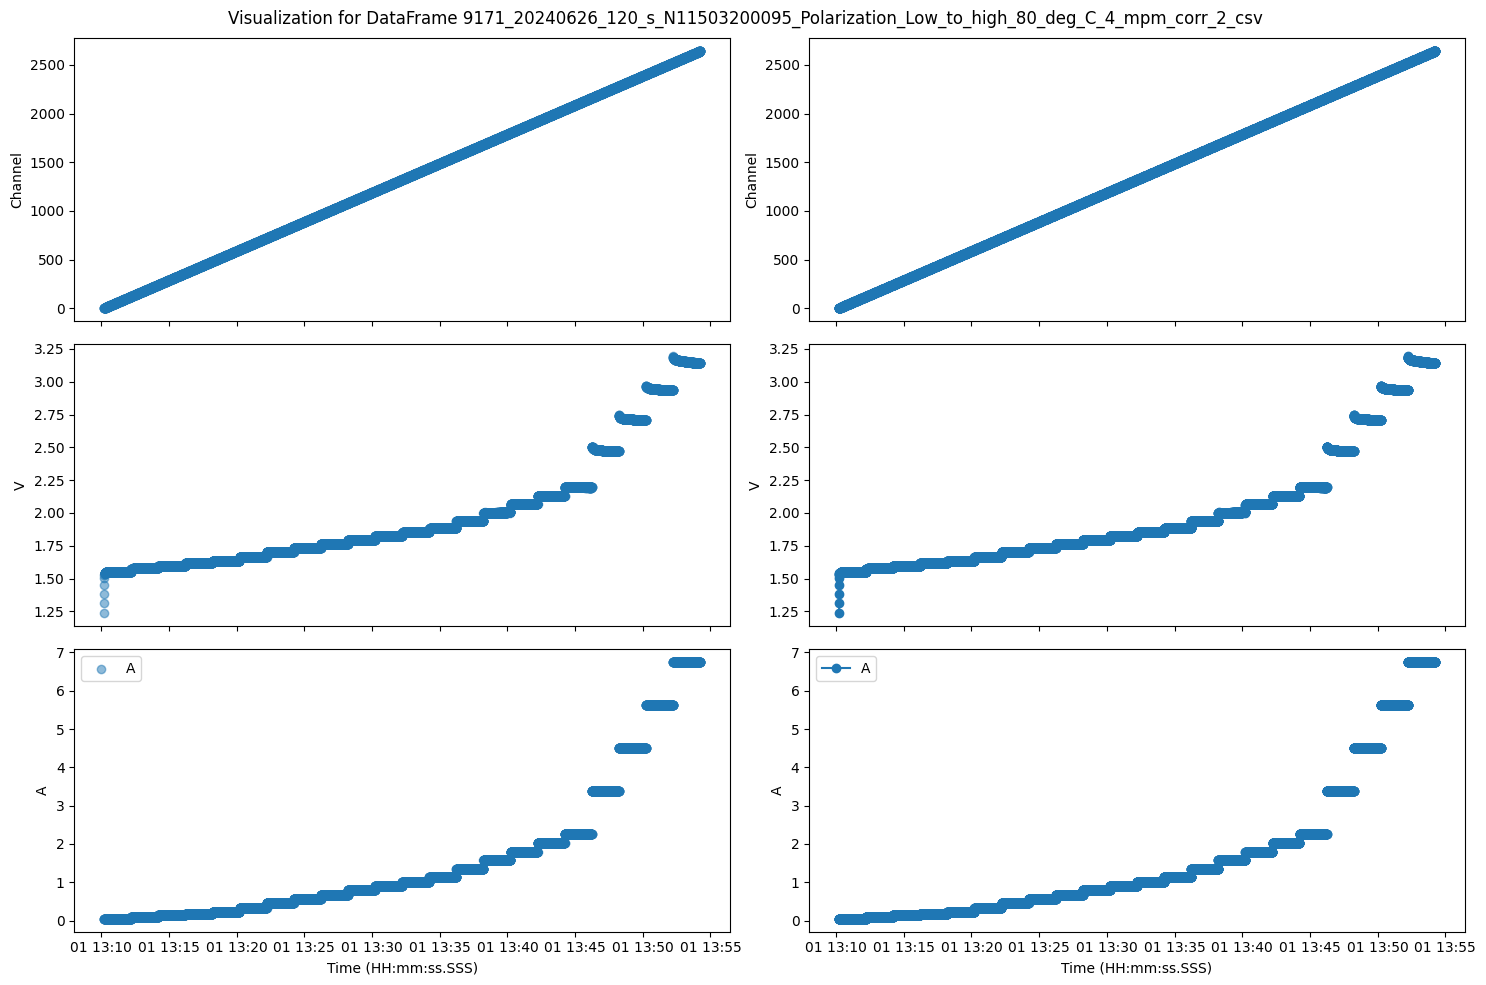

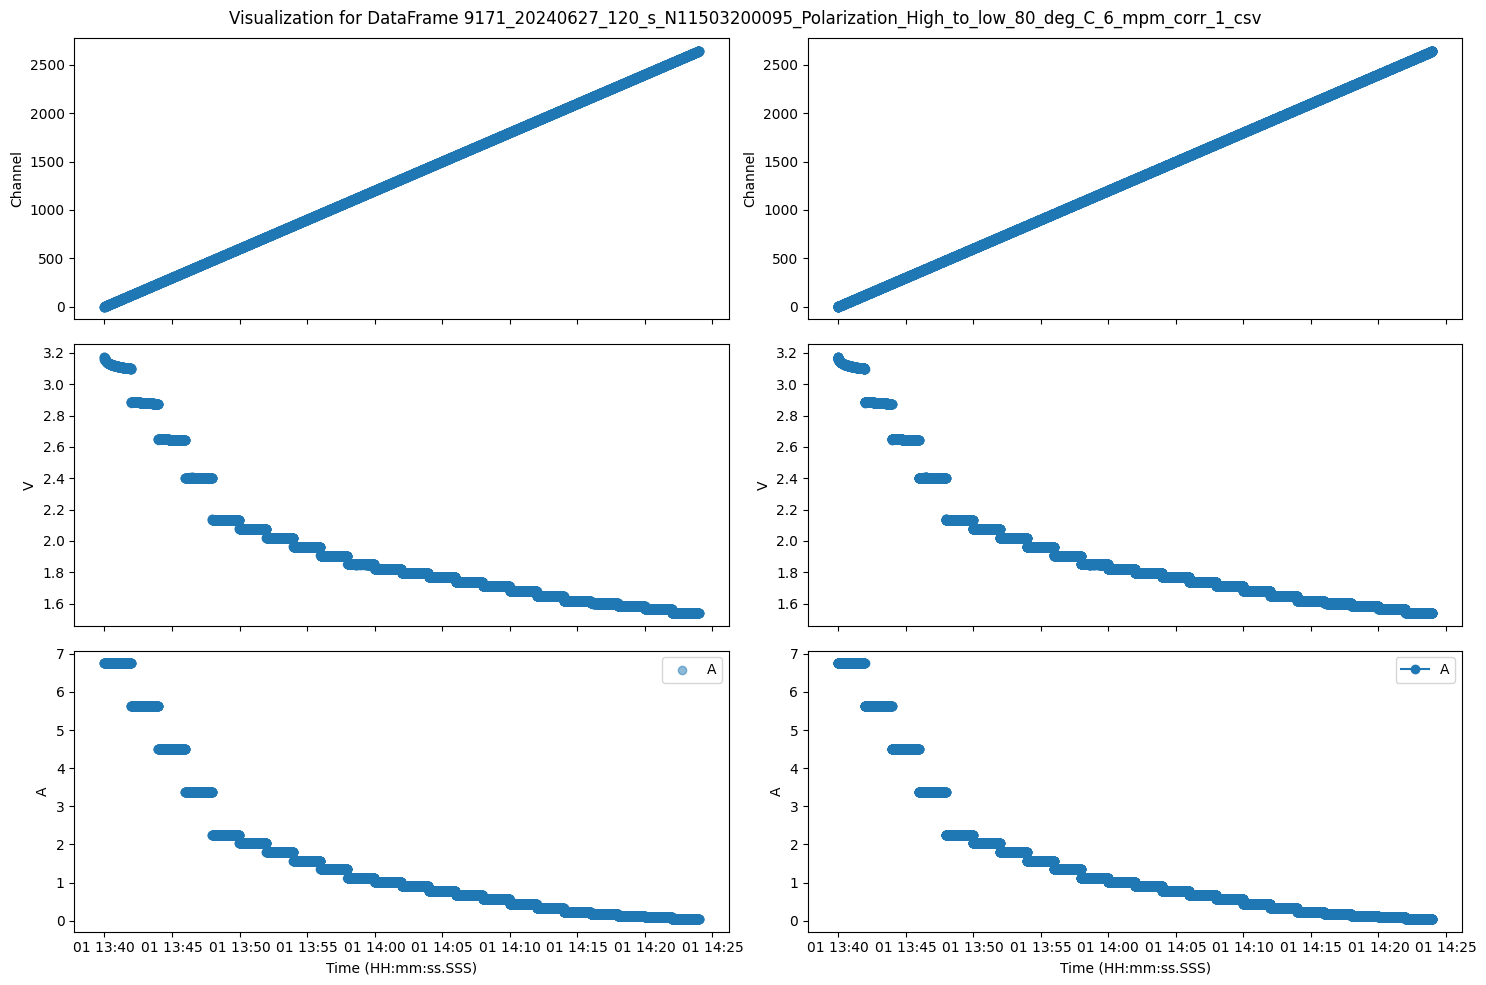

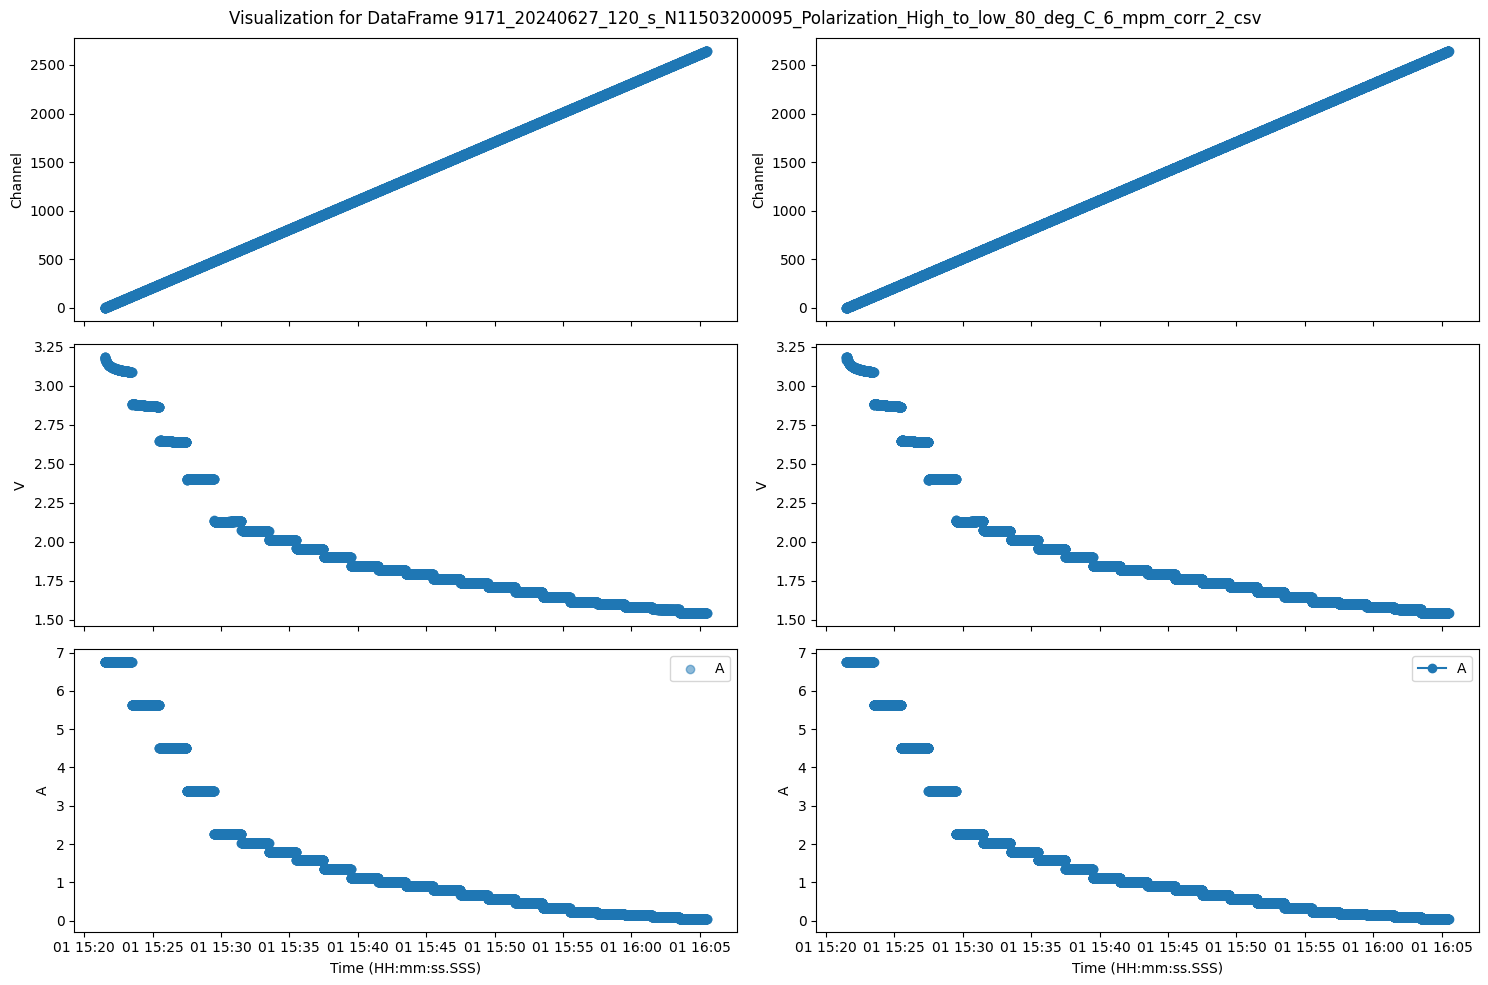

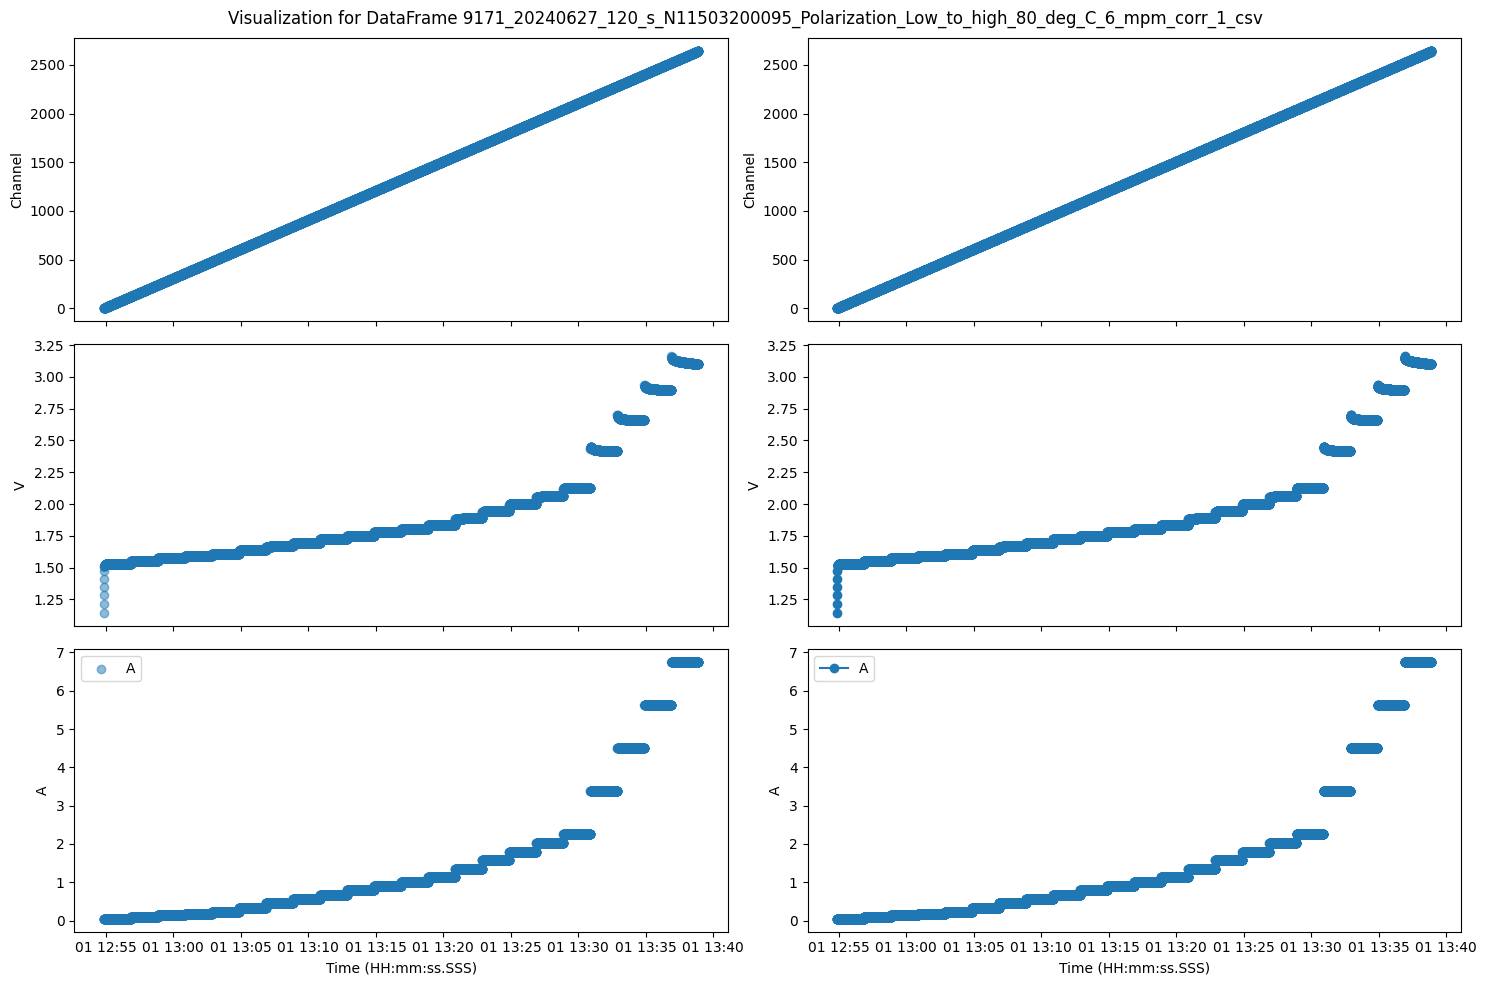

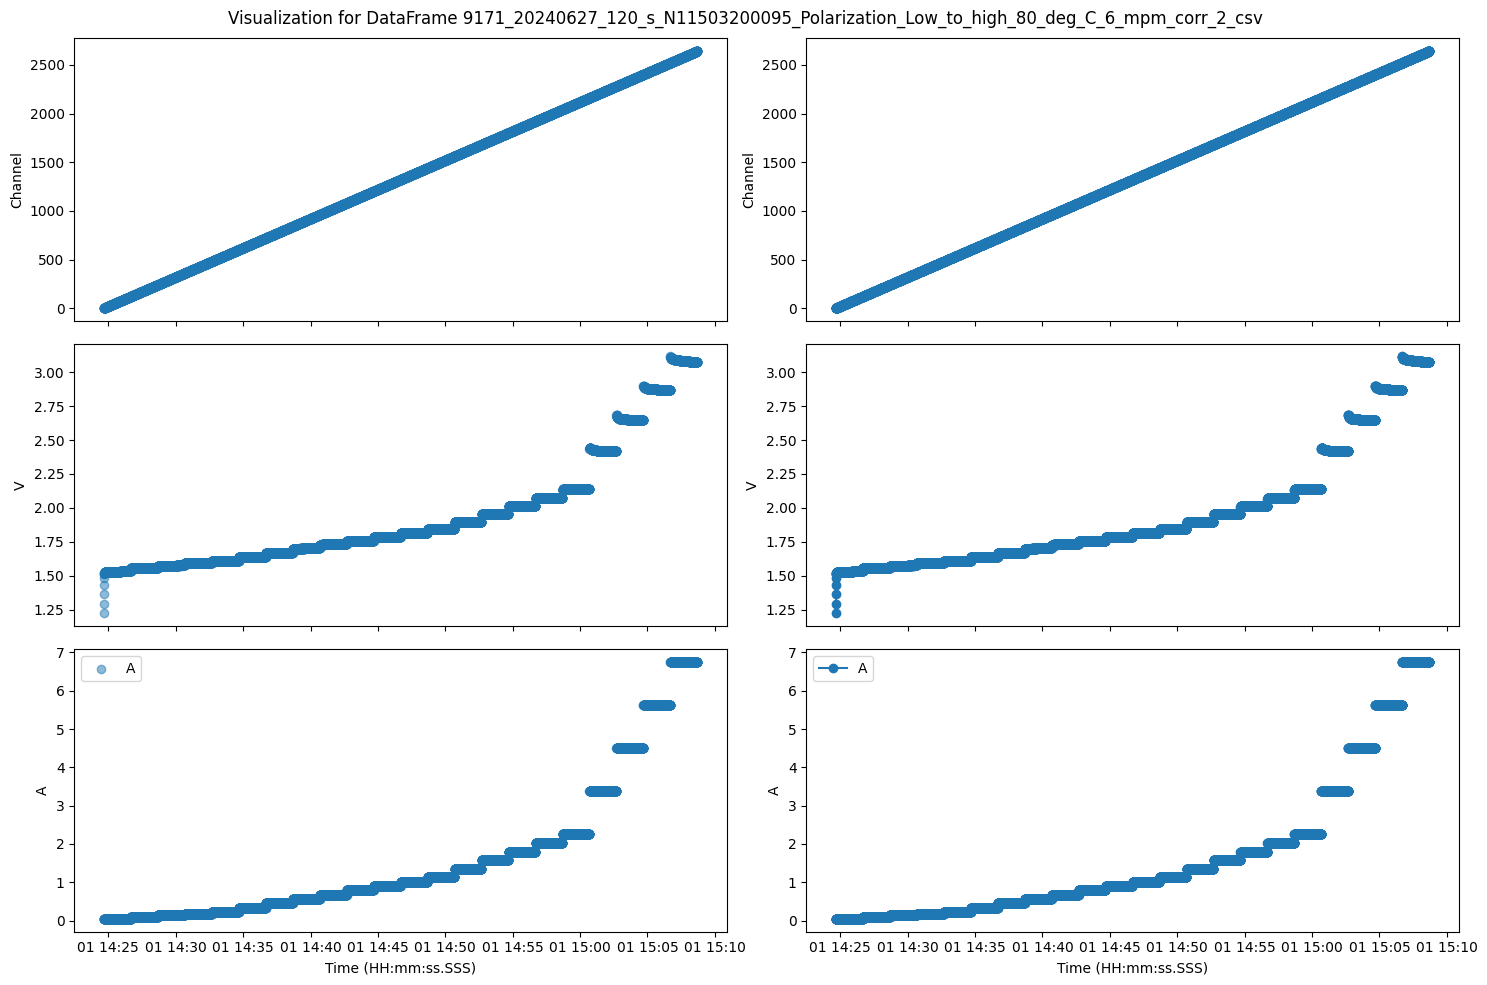

In [32]:
# Create plots for each DataFrame
for key, df in dataframes.items():
    # Convert 'Time (HH:mm:ss.SSS)' to datetime with explicit format
    df['Time (HH:mm:ss.SSS)'] = pd.to_datetime(df['Time (HH:mm:ss.SSS)'], format='%H:%M:%S.%f', errors='coerce')
    
    # Ensure 'Channel', 'V', and 'A' are numeric
    df[['Channel', 'V', 'A']] = df[['Channel', 'V', 'A']].apply(pd.to_numeric, errors='coerce')
    
    # Plotting setup
    fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 10), sharex=True)
    fig.suptitle(f"Visualization for DataFrame {key}")
    
    # Scatter plots
    axs[0, 0].scatter(df['Time (HH:mm:ss.SSS)'], df['Channel'], label='Channel', alpha=0.5)
    axs[1, 0].scatter(df['Time (HH:mm:ss.SSS)'], df['V'], label='V', alpha=0.5)
    axs[2, 0].scatter(df['Time (HH:mm:ss.SSS)'], df['A'], label='A', alpha=0.5)
    
    # Line plots
    axs[0, 1].plot(df['Time (HH:mm:ss.SSS)'], df['Channel'], label='Channel', marker='o')
    axs[1, 1].plot(df['Time (HH:mm:ss.SSS)'], df['V'], label='V', marker='o')
    axs[2, 1].plot(df['Time (HH:mm:ss.SSS)'], df['A'], label='A', marker='o')
    
    # Set Y-axis labels for scatter plots
    axs[0, 0].set_ylabel('Channel')
    axs[1, 0].set_ylabel('V')
    axs[2, 0].set_ylabel('A')
    
    # Set Y-axis labels for line plots
    axs[0, 1].set_ylabel('Channel')
    axs[1, 1].set_ylabel('V')
    axs[2, 1].set_ylabel('A')
    
    # X-axis label and legend for scatter plots
    axs[2, 0].set_xlabel('Time (HH:mm:ss.SSS)')
    axs[2, 0].legend()
    
    # X-axis label and legend for line plots
    axs[2, 1].set_xlabel('Time (HH:mm:ss.SSS)')
    axs[2, 1].legend()
    
    # Adjust layout
    plt.tight_layout()
    plt.show()


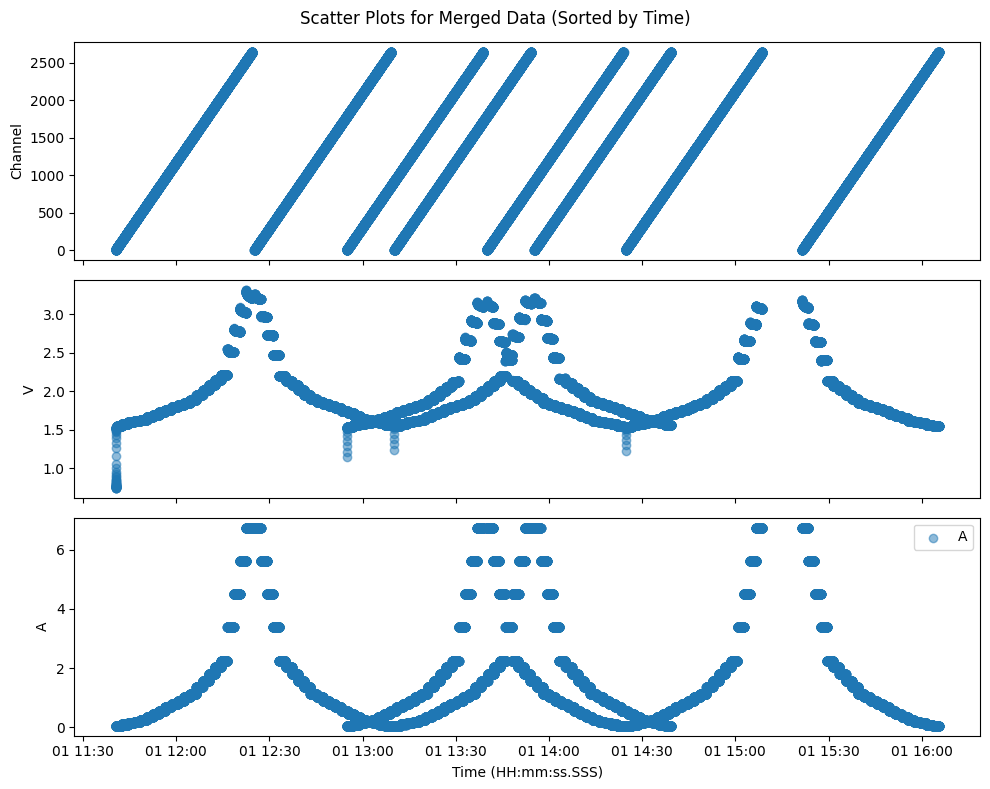

In [33]:
# Merge all DataFrames into one
merged_df = pd.concat(dataframes.values(), ignore_index=True)

# Convert 'Time (HH:mm:ss.SSS)' to datetime if it's not already
merged_df['Time (HH:mm:ss.SSS)'] = pd.to_datetime(merged_df['Time (HH:mm:ss.SSS)'], format='%H:%M:%S.%f', errors='coerce')

# Sort by 'Time (HH:mm:ss.SSS)'
merged_df.sort_values(by='Time (HH:mm:ss.SSS)', inplace=True)

# Plotting setup
fig, axs = plt.subplots(nrows=3, figsize=(10, 8), sharex=True)
fig.suptitle('Scatter Plots for Merged Data (Sorted by Time)')

# Scatter plots for Channel, V, and A
axs[0].scatter(merged_df['Time (HH:mm:ss.SSS)'], merged_df['Channel'], label='Channel', alpha=0.5)
axs[1].scatter(merged_df['Time (HH:mm:ss.SSS)'], merged_df['V'], label='V', alpha=0.5)
axs[2].scatter(merged_df['Time (HH:mm:ss.SSS)'], merged_df['A'], label='A', alpha=0.5)

# Set Y-axis labels
axs[0].set_ylabel('Channel')
axs[1].set_ylabel('V')
axs[2].set_ylabel('A')

# X-axis label and legend
axs[2].set_xlabel('Time (HH:mm:ss.SSS)')
axs[2].legend()

# Adjust layout
plt.tight_layout()
plt.show()
